In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [58]:
df = pd.read_csv("data/latihan_4_nb.csv")
df

,ID,OUTLOOK,TEMPERATUR,HUMIDITY,WINDY,PLAY
0,1,Sunny,Hot,High,False,0
1,2,Sunny,Hot,High,True,0
2,3,Cluody,Hot,High,False,1
3,4,Rainy,Mild,High,False,1
4,5,Rainy,Cool,Normal,False,1
5,6,Rainy,Cool,Normal,True,1
6,7,Cloudy,Cool,Normal,True,1
7,8,Sunny,Mild,High,False,0
8,9,Sunny,Cool,Normal,False,1
9,10,Rainy,Mild,Normal,False,1


In [ ]:
X = df.drop(columns="PLAY")
y = df.PLAY

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [48]:
preprocessor = ColumnTransformer([
    ('categoric',cat_pipe(encoder='onehot'),["OUTLOOK","TEMPERATUR","HUMIDITY","WINDY"]),
])

In [60]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep',preprocessor),
    ('algo',GaussianNB())
])

In [61]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['OUTLOOK', 'TEMPERATUR',
                                                   'HUMIDITY', 'WINDY'])])),
                ('algo', GaussianNB())])

In [62]:
pipeline.score(X_train,y_train)

0.9090909090909091

In [63]:
pipeline.score(X_test,y_test)

1.0

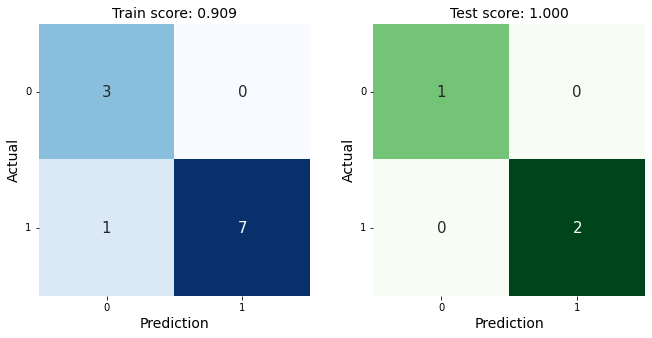

In [64]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train,y_train,X_test,y_test,pipeline)

In [66]:
X_pred = pd.read_csv("data/latihan_4_nb_testing.csv")
X_pred 

,ID,OUTLOOK,TEMPERATUR,HUMIDITY,WINDY
0,1,Rainy,Cool,High,False


In [67]:
X_pred["PLAY"] = pipeline.predict(X_pred)
X_pred

,ID,OUTLOOK,TEMPERATUR,HUMIDITY,WINDY,PLAY
0,1,Rainy,Cool,High,False,1
